# Assignment 4

## Andrew Taylor

## atayl136

**1. [20 pts] Discuss at least three major problems associated with training GANs, such as
mode collapse, vanishing gradients, and training instability. Explain why these issues arise
and how they impact the performance and quality of generated samples. Research and find
what kind of GANs, modifications to GANs are proposed to handle such problems.**

# Major Problems in GAN Training: Origins and Impact

Generative Adversarial Networks face several fundamental challenges that stem from their unique adversarial training paradigm. Unlike traditional neural networks that optimize a single objective function, GANs involve two competing networks locked in a minimax game, creating a complex optimization landscape fraught with instabilities. These challenges significantly impact both the training process and the quality of generated samples.

## Mode Collapse: The Diversity Crisis

Mode collapse represents one of the most pervasive issues in GAN training, arising from the generator's tendency to exploit weaknesses in the discriminator rather than learning the complete data distribution. When the generator discovers specific outputs that consistently fool the discriminator, it gravitates toward these "safe" solutions and abandons exploration of other possible outputs. This happens because the generator's objective is simply to maximize the probability of deceiving the discriminator, not to capture the full diversity of real data.

The impact on generated samples is severe and immediately apparent. Instead of producing varied, realistic outputs that span the entire data distribution, the generator produces repetitive, homogeneous samples. In face generation tasks, for instance, the model might only generate faces of certain demographics or expressions, completely ignoring other variations present in the training data. This fundamentally undermines the purpose of generative modeling, which is to learn and reproduce the rich diversity of real-world data distributions.

## Vanishing Gradients: The Learning Shutdown

The vanishing gradient problem emerges when the discriminator becomes too proficient at its classification task, creating a scenario where the generator receives no meaningful learning signal. This occurs because as the discriminator approaches perfect classification accuracy, distinguishing real data with probability near one and fake data with probability near zero, the gradient of the generator's loss function approaches zero. The mathematical foundation of backpropagation relies on non-zero gradients to update network parameters, so when gradients vanish, learning effectively ceases.

This problem profoundly impacts sample quality by creating a ceiling effect on generator improvement. Even if the generator is producing obviously fake samples, it cannot receive feedback on how to improve them. The discriminator's overwhelming success paradoxically prevents the entire system from advancing. Generated samples remain stuck at whatever quality level they achieved before the gradients vanished, often resulting in blurry, unrealistic outputs that bear little resemblance to the target distribution.

## Training Instability: The Optimization Chaos

Training instability stems from the fundamental tension between two networks with opposing objectives, creating a dynamic system that lacks the convergence guarantees of traditional optimization. The generator tries to maximize classification error while the discriminator tries to minimize it, leading to a constantly shifting optimization landscape where each network's improvements change the problem the other network is trying to solve. This adversarial dynamic is inherently unstable because there's no single loss function being minimized; instead, we have a two-player game where the optimal strategy for each player depends on the other's current state.

The consequences for sample quality are unpredictable and often catastrophic. Training instability manifests as erratic oscillations in loss functions, where the generator might produce reasonable samples one epoch and completely nonsensical outputs the next. These oscillations can lead to catastrophic forgetting, where the generator suddenly loses the ability to produce certain types of samples it had previously learned. The resulting generated samples exhibit high variance in quality, with some appearing realistic while others are clearly artificial, making the model unreliable for practical applications.

## Non-Convergence and Equilibrium Issues: The Nash Dilemma

The non-convergence problem arises from the game-theoretic nature of GAN training, where the desired outcome requires reaching a Nash equilibrium that may not exist or may be unattainable through gradient-based optimization. Traditional neural network training involves finding a minimum of a loss function, a well-understood optimization problem with established convergence properties. GANs, however, require finding a point where neither the generator nor discriminator can improve their performance given the other's strategy, which is a fundamentally different and more complex problem.

This issue impacts sample quality by preventing the model from reaching its theoretical potential. Even when both networks are individually capable of excellent performance, their inability to reach a stable equilibrium means the system never settles into a configuration that produces consistently high-quality samples. The generator might oscillate between different strategies, producing good samples when it happens to align well with the discriminator's current state, but failing to maintain this quality as training continues.

## Interconnected Impact on Sample Quality

These problems rarely occur in isolation and often compound each other's effects on generated sample quality. When training becomes unstable, it can trigger mode collapse as the generator retreats to previously successful outputs. Vanishing gradients can freeze the generator in a state of mode collapse, preventing recovery. Non-convergence issues can cause periodic episodes of instability that reset any progress made in addressing other problems.

The cumulative effect on generated samples is a significant degradation in both quality and diversity. Samples may exhibit artifacts, lack fine-grained details, show poor coherence in complex structures, or fail to capture the full range of variation present in real data. These quality issues make GANs unreliable for applications requiring consistent, high-fidelity outputs, limiting their practical utility despite their theoretical promise. Understanding these interconnected challenges is crucial for developing more robust training procedures and architectural innovations that can deliver on GANs' potential for high-quality generative modeling.

# GAN Modifications That Address These Problems


## Alternative Loss Functions and Distance Metrics

The fundamental approach to *addressing GAN training instabilities* has centered on reimagining the objective functions that drive the adversarial training process. Wasserstein GANs (WGANs) represent perhaps the most significant breakthrough in this area, replacing the traditional Jensen-Shannon divergence with the Earth Mover's Distance, also known as the Wasserstein distance. This mathematical reformulation provides meaningful gradients even when the generator and real data distributions have minimal overlap, a condition that typically causes vanishing gradients in conventional GANs. The Wasserstein distance measures the "cost" of transforming one distribution into another, conceptually like moving piles of earth, which creates a smoother optimization landscape that guides the generator toward the real data distribution more effectively.

WGAN-GP (Wasserstein GAN with Gradient Penalty) further refined this approach by replacing the problematic weight clipping mechanism with a gradient penalty that enforces the Lipschitz constraint more elegantly. This modification *prevents the optimization difficulties* associated with weight clipping while maintaining the theoretical guarantees that make WGANs effective. Least Squares GANs (LSGANs) take a different approach by replacing the traditional cross-entropy loss with a squared loss function, which penalizes samples that fall far from the decision boundary rather than simply classifying them as real or fake. This creates more stable gradients and *reduces the mode-seeking behavior* that leads to collapse, as the generator receives continuous feedback about how far its outputs are from the desired distribution rather than binary classification signals.

These alternative loss functions fundamentally change the training dynamics by providing more informative gradients, *reducing the likelihood of vanishing gradients*, and creating smoother optimization landscapes. The continuous nature of these loss functions helps prevent the generator from getting trapped in local minima and encourages exploration of the full data distribution. The theoretical foundations of these approaches also provide better convergence guarantees, making GAN training more predictable and reliable across different architectures and datasets.

## Architectural Innovations and Regularization Techniques

Spectral normalization has emerged as one of the most widely adopted architectural modifications for *stabilizing GAN training*, working by constraining the Lipschitz constant of neural network layers through normalization of weight matrices by their spectral norms. This technique addresses both exploding and vanishing gradient problems by ensuring that the largest singular value of each weight matrix equals one, which bounds the gradient flow throughout the network. Research has revealed an unexpected connection between spectral normalization and classical neural network initialization techniques like LeCun initialization, explaining why it requires minimal hyperparameter tuning while providing robust stabilization across diverse architectures and datasets.

The effectiveness of spectral normalization extends beyond gradient control to encompass the broader dynamics of adversarial training. By preventing the discriminator from becoming too powerful too quickly, spectral normalization *maintains a more balanced competition* between the generator and discriminator, reducing the likelihood of training collapse. Bidirectional Scaled Spectral Normalization (BSSN) represents a recent advancement that incorporates insights from modern initialization methods like Xavier and Kaiming initialization, providing even better gradient control and improved sample quality while maintaining the simplicity and effectiveness of the original approach.

Self-attention mechanisms, popularized by the Transformer architecture and adapted for GANs in the Self-Attention GAN (SAGAN), address the fundamental limitation of convolutional networks in capturing long-range spatial dependencies. Traditional convolutional GANs process images through locally connected layers, requiring many layers to propagate information across distant image regions, which leads to information loss and computational inefficiency. The self-attention mechanism enables any position in the feature map to directly attend to any other position, allowing the network to model relationships between distant image regions efficiently. This capability is particularly crucial for generating images with complex structural relationships, such as faces where eye color should be consistent or animals where body parts must maintain anatomical coherence.

The integration of self-attention with spectral normalization in SAGAN demonstrates how multiple architectural innovations can work synergistically. The attention mechanism improves the generator's ability to maintain global consistency, while spectral normalization ensures stable training dynamics. The gradual learning approach in SAGAN, where the attention weight is initialized to zero and gradually increased during training, allows the network to first establish local features before incorporating global relationships, *preventing the attention mechanism from interfering with early-stage learning*.

## Progressive Training Methodologies

Progressive Growing GANs (ProGAN) revolutionized high-resolution image generation by introducing a curriculum learning approach to GAN training that starts with extremely low-resolution images and gradually increases complexity throughout the training process. This methodology begins with 4×4 pixel images and systematically adds layers to both the generator and discriminator to handle progressively higher resolutions, eventually reaching 1024×1024 pixels or beyond. The key insight behind this approach is that learning to generate high-quality low-resolution images is significantly easier than immediately attempting high-resolution synthesis, allowing the networks to establish fundamental image structures before refining details.

The progressive growing process is not simply a matter of abruptly switching to higher resolutions; instead, it employs a smooth fade-in mechanism where new layers are gradually introduced with increasing influence while maintaining the output from previous resolution levels. This smooth transition prevents training disruption and allows the networks to adapt gradually to the increased complexity. The approach provides multiple benefits: faster initial training since early stages work with smaller images requiring less computation, *improved stability* since the networks build complexity incrementally, and higher sample quality since the gradual refinement process typically produces more coherent results than training large networks from scratch.

Progressive training fundamentally changes the optimization landscape by decomposing the complex task of high-resolution image generation into a series of more manageable sub-tasks. Each resolution level allows the network to focus on features appropriate to that scale: coarse structure and composition at low resolutions, medium-level features like object shapes at intermediate resolutions, and fine details like textures at high resolutions. This hierarchical learning approach aligns with how human vision processes images, from global structure to local details, and provides a more natural learning progression for neural networks.

The success of progressive training extends beyond stability improvements to enable unprecedented image quality and resolution. By the time training reaches high resolutions, the networks have already established robust representations of image structure, making it easier to add fine details without destabilizing the entire system. Additional techniques like minibatch standard deviation layers *help combat mode collapse* by providing the discriminator with information about batch diversity, while equalized learning rates ensure that different network layers learn at appropriate relative speeds throughout the progressive training process.

## Advanced Architectural Variants and Training Strategies

StyleGAN represents the culmination of multiple architectural innovations, building upon progressive growing while introducing a revolutionary approach to latent space organization through its mapping network and adaptive instance normalization (AdaIN) layers. The mapping network transforms the traditional latent space into an intermediate W-space that exhibits better disentanglement properties, allowing independent control over different image attributes such as pose, hair color, facial features, and background. This architectural modification addresses the entanglement problems that plague traditional GANs, where changing one aspect of the generated image inadvertently affects others.

The StyleGAN architecture incorporates style injection at multiple scales through AdaIN layers, enabling fine-grained control over image generation from coarse features like pose and face shape to fine details like skin texture and hair strands. Path length regularization further enhances the architecture by ensuring smooth interpolations in the latent space, preventing sudden changes or artifacts when moving between different points in the latent space. The combination of progressive growing, spectral normalization, and these novel architectural elements creates a system that not only generates high-quality images but also provides unprecedented control over the generation process.

Recent developments have introduced ensemble approaches and multiple discriminator architectures that distribute the learning task across several networks, reducing the pressure on individual components and *improving overall stability*. These approaches recognize that the adversarial training problem may be too complex for a single discriminator to solve effectively, particularly when dealing with diverse and complex datasets. Multiple generators can focus on different modes of the data distribution, while multiple discriminators can provide specialized feedback for different aspects of image quality or different regions of the data space.

The integration of regularization techniques like gradient penalties, spectral normalization, and novel training schedules creates robust training pipelines that can handle diverse datasets and architectural configurations with minimal hyperparameter tuning. Modern GAN training often combines multiple techniques: alternative loss functions *provide stable gradients*, architectural innovations enable better feature learning, progressive training ensures manageable complexity growth, and regularization techniques *maintain training stability*. This multi-faceted approach has transformed GANs from notoriously difficult models to train into reliable tools for high-quality image generation, with training procedures that can be successfully applied across different domains and applications.

**2. [20 pts] Research and find out if GANs are associated to a zero-sum-game. Explain how
GANs can be modeled using game theory concepts, specifically:
(a.) The roles of the generator and discriminator as strategic players.
(b.) The concept of Nash equilibrium in the context of GAN training.
(c.) Why training instability occurs and how it relates to non-convergent game dynamics.**

# GANs and Game Theory (Zero-Sum Games, Strategic Players, and Training Dynamics)

## GANs as Zero-Sum Games

Generative Adversarial Networks are fundamentally structured as zero-sum games, a classical concept from game theory where one player's gain is exactly equal to another player's loss. In the GAN framework, the generator and discriminator exist in a competitive relationship where the total utility remains constant across all outcomes. When the generator succeeds in creating realistic samples that fool the discriminator, it gains utility while the discriminator loses an equivalent amount, and vice versa when the discriminator correctly identifies fake samples.

The mathematical formulation of GANs explicitly embodies this zero-sum nature through the minimax objective function. The generator seeks to minimize the discriminator's ability to distinguish real from fake data, while the discriminator simultaneously tries to maximize its classification accuracy. This creates a direct opposition where improving one network's performance inherently diminishes the other's effectiveness. The zero-sum property is formally captured in the original GAN objective where the generator minimizes the same function that the discriminator maximizes, ensuring that any improvement in the generator's ability to fool the discriminator corresponds to an equal deterioration in the discriminator's ability to detect fake samples.

However, recent theoretical analysis has revealed that while GANs are designed as zero-sum games, they may not always possess the classical properties assumed by traditional game theory. Research has shown that GAN zero-sum games may actually lack Nash equilibria entirely in many practical scenarios, challenging the fundamental assumptions about their convergence properties. This discovery has profound implications for understanding why GAN training is notoriously difficult and unstable, as the theoretical framework that should guarantee the existence of stable solutions may not apply to the high-dimensional, continuous parameter spaces that characterize neural networks.

The zero-sum nature also creates inherent challenges for optimization algorithms. Traditional optimization methods are designed to find minima of single objective functions, but GANs require finding equilibria in a two-player game where each player has conflicting objectives. This fundamental mismatch between the problem structure and available optimization tools contributes to the training difficulties observed in practice, where standard gradient descent may fail to converge to stable solutions even when such solutions theoretically exist.

## (a) Roles of Generator and Discriminator as Strategic Players

The generator and discriminator in GANs function as strategic players in a game-theoretic sense, each possessing their own objectives, strategies, and decision-making processes that directly influence the outcome of their opponent. The generator acts as a strategic player whose goal is to learn a mapping from random noise to realistic data samples, effectively trying to minimize the discriminator's ability to detect artificially generated content. Its strategy space encompasses all possible neural network configurations and parameter settings that can transform random input into data that resembles the training distribution.

The discriminator operates as the opposing strategic player with the objective of maximizing its classification accuracy in distinguishing between real training data and samples produced by the generator. Its strategy involves learning decision boundaries and feature representations that can reliably separate authentic data from generator outputs. The discriminator's strategic choices directly impact the generator's learning process, as the gradients the generator receives for parameter updates depend entirely on the discriminator's current state and decision-making capabilities.

The strategic interaction between these players creates a complex dynamic where each network must adapt not only to the underlying data distribution but also to the evolving behavior of its opponent. The generator must continuously evolve its strategy to counter the discriminator's improving ability to detect fake samples, while the discriminator must adapt to the generator's increasingly sophisticated attempts at creating realistic outputs. This creates an arms race scenario where both players are simultaneously trying to outmaneuver each other while learning from the same underlying data.

The strategic nature of this interaction is further complicated by the sequential and simultaneous aspects of GAN training. In practice, training often alternates between updating the generator and discriminator, creating a sequential game structure where each player responds to the other's most recent strategy. However, the underlying mathematical formulation assumes simultaneous play, where both players choose their strategies without knowledge of their opponent's current choice. This discrepancy between theoretical formulation and practical implementation introduces additional complexity into the strategic analysis of GAN training.

The concept of bounded rationality becomes particularly relevant in understanding GANs as strategic players. Unlike perfectly rational players assumed in classical game theory, neural networks have limited computational capacity and operate under constraints such as finite training time, limited data, and architectural restrictions. This bounded rationality affects how each player can explore their strategy space and respond to their opponent's moves, potentially leading to suboptimal equilibria or preventing convergence to theoretical optimal solutions.

## (b) Nash Equilibrium in GAN Training

The concept of Nash equilibrium provides the theoretical foundation for understanding the desired outcome of GAN training, representing a state where neither the generator nor discriminator can unilaterally improve their performance by changing their strategy while the opponent's strategy remains fixed. In the ideal Nash equilibrium for GANs, the generator produces samples that are indistinguishable from real data, while the discriminator can only guess randomly (outputting 0.5 probability) since it cannot reliably differentiate between real and generated samples.

Achieving this Nash equilibrium would represent the perfect solution to the generative modeling problem, where the generator has learned to capture the complete data distribution without any mode collapse or quality degradation. At this point, the discriminator has been optimally trained to detect fake samples but finds itself unable to do so because the generator's outputs are statistically identical to real data. This creates a stable configuration where neither network has incentive to deviate from their current strategy unilaterally.

However, the existence and reachability of Nash equilibria in GANs present significant theoretical and practical challenges. Recent research has demonstrated that many GAN formulations may not possess any Nash equilibria at all, particularly when the strategy spaces are restricted to practical neural network architectures. The continuous, high-dimensional parameter spaces of neural networks, combined with the non-convex nature of the underlying optimization landscape, create scenarios where traditional game-theoretic guarantees about equilibrium existence do not apply.

Even when Nash equilibria exist, they may not be unique, leading to multiple possible outcomes with varying qualities and characteristics. Some equilibria may correspond to mode collapse scenarios where the generator produces limited diversity, while others may represent high-quality solutions with full data distribution coverage. The training process has no inherent mechanism to select among these equilibria, potentially leading to convergence to suboptimal solutions even when better equilibria exist.

The concept of local versus global Nash equilibria further complicates the analysis. While global equilibria represent the theoretically optimal solutions, the gradient-based optimization methods used in practice can only guarantee convergence to local equilibria under the best circumstances. These local equilibria may correspond to various forms of training failure, including mode collapse, where the generator repeatedly produces similar outputs, or scenarios where the generator fails to capture significant portions of the data distribution.

Recent work has introduced alternative equilibrium concepts specifically designed for GANs, such as proximal equilibria, which better capture the sequential nature of practical GAN training where the generator moves first followed by the discriminator. These alternative formulations acknowledge that the theoretical simultaneous-move Nash equilibrium may not adequately model the actual training dynamics, leading to more realistic theoretical frameworks for understanding GAN convergence properties.

## (c) Training Instability and Non-Convergent Game Dynamics

Training instability in GANs arises fundamentally from the non-convergent dynamics inherent in two-player games when solved using gradient-based optimization methods designed for single-objective optimization problems. Unlike traditional machine learning scenarios where networks minimize a well-defined loss function with convergence guarantees, GANs require finding equilibria in a dynamic system where each player's optimal strategy depends on their opponent's current strategy, creating a constantly shifting optimization landscape.

The mathematical structure of the GAN minimax problem creates dynamics that can exhibit oscillatory behavior rather than convergence to stable solutions. When both networks update their parameters simultaneously using gradient descent, the resulting dynamics can resemble those of a harmonic oscillator, where the system continuously cycles through different states without settling into a stable equilibrium. These oscillations manifest as periodic changes in the generator's output quality and the discriminator's classification accuracy, preventing the system from reaching the desired Nash equilibrium.

The non-convex nature of the neural network optimization landscape exacerbates these instability issues by creating multiple local minima and saddle points that can trap the optimization process. In single-objective optimization, such landscapes still allow for meaningful progress toward better solutions, but in the adversarial setting, getting stuck in local optima for one player can prevent the entire system from reaching global equilibrium. The discriminator might become trapped in a configuration that provides misleading gradients to the generator, while the generator might settle into a mode that produces limited diversity despite achieving local optimality with respect to the current discriminator.

Gradient vanishing and explosion problems take on additional complexity in the adversarial setting because they can affect the balance between the two players. If the discriminator becomes too powerful too quickly, it can provide vanishing gradients to the generator, effectively preventing further learning. Conversely, if the generator updates too aggressively, it can drive the discriminator into regions where its gradients become unreliable, leading to unstable training dynamics. This delicate balance requirement makes GAN training extremely sensitive to hyperparameter choices such as learning rates, update frequencies, and network architectures.

The phenomenon of mode collapse represents a specific type of training instability where the generator converges to producing a limited subset of the possible outputs, effectively reducing the diversity of generated samples. From a game-theoretic perspective, mode collapse can be understood as the generator discovering a local equilibrium where it can consistently fool the discriminator by focusing on a small region of the data space. Once this occurs, the discriminator adapts to reject these specific outputs, but gradient descent cannot effectively separate the identical outputs produced by the collapsed generator, leading to persistent oscillations around this degenerate equilibrium.

The temporal dynamics of GAN training create additional challenges that distinguish it from static game analysis. Each training iteration changes both players' strategies, creating a path-dependent process where the order and timing of updates can significantly influence the final outcome. This temporal aspect means that even if a global Nash equilibrium exists, the specific trajectory taken by the optimization algorithm may prevent the system from reaching it, instead leading to convergence to inferior local equilibria or persistent non-convergent oscillations.

Modern approaches to addressing these instability issues often involve modifying the game structure itself rather than simply improving optimization algorithms. Techniques such as spectral normalization alter the Lipschitz properties of the discriminator to ensure more stable gradient flow, while progressive training changes the game dynamically by gradually increasing complexity. These modifications acknowledge that the fundamental game-theoretic structure of GANs may need to be altered to achieve stable training, moving beyond the pure zero-sum formulation toward more complex game variants that possess better convergence properties.

**3. analyze the learning speed of GAN and WGAN networks and how fast they
converge while learning to create fake images. Feel free to use a smaller dataset, such as
MNIST or CIFAR-10, or make it small by removing certain classes from the dataset. Update
the GAN module to create a Wasserstein GAN. Note that we are following the Arjovsky 2017
paper.
3. [50 pts]
• Remove the sigmoid so the output is a regressor.
• Change real and fake outputs to +1 and −1.
• Update the loss function for a Wasserstein GAN.
• Update the optimizers if necessary.
• Update the critic to run a few times more than the generator.
• Use a variable clip-weight (e.g., 0.01) to update and clip the weights of the critic
between [-clip-weight, +clip-weight].
Show the convergence plots comparing GAN and WGAN and show some generated
images.**

PyTorch version= 2.5.1
torchvision version= 0.20.1
CUDA available= True
TRAINING COMPARISON: VANILLA GAN vs WGAN
\nTraining Configuration:
- Epochs: 25
- Batch Size: 512
- Dataset: MNIST (all digits)
\n--- VANILLA GAN ---
- Optimizer: Adam
- Learning Rate: 0.0002
- Loss: Binary Cross Entropy
- Labels: Real=1.0, Fake=0.0
- Final Activation: Sigmoid
\nStarting Vanilla GAN training...


\r001/ 25 | LossDr:  0.629 | lossDf:  0.913 | lossG:  0.956\r002/ 25 | LossDr:  0.067 | lossDf:  0.124 | lossG:  3.719\r003/ 25 | LossDr:  0.068 | lossDf:  0.065 | lossG:  3.212\r004/ 25 | LossDr:  0.091 | lossDf:  0.099 | lossG:  2.979\r005/ 25 | LossDr:  0.108 | lossDf:  0.059 | lossG:  2.533\r006/ 25 | LossDr:  0.080 | lossDf:  0.161 | lossG:  2.834\r007/ 25 | LossDr:  0.161 | lossDf:  0.113 | lossG:  2.232\r008/ 25 | LossDr:  0.152 | lossDf:  0.370 | lossG:  2.284\r009/ 25 | LossDr:  0.204 | lossDf:  0.314 | lossG:  1.917\r010/ 25 | LossDr:  0.043 | lossDf:  1.116 | lossG:  3.960\r011/ 25 | LossDr:  0.938 | lossDf:  0.062 | lossG:  0.842\r012/ 25 | LossDr:  0.688 | lossDf:  0.366 | lossG:  0.833\r013/ 25 | LossDr:  0.233 | lossDf:  0.670 | lossG:  1.913\r014/ 25 | LossDr:  0.343 | lossDf:  0.324 | lossG:  1.394\r015/ 25 | LossDr:  0.542 | lossDf:  0.241 | lossG:  1.172\r016/ 25 | LossDr:  0.248 | lossDf:  0.499 | lossG:  1.461\r017/ 25 | LossDr:  0.201 | lossDf:  0.540 | lossG:  2.

\n\n--- WGAN ---
- Optimizer: RMSprop
- Learning Rate: G=5e-05, C=5e-05
- Loss: Wasserstein Distance
- Labels: Real=+1.0, Fake=-1.0
- Final Activation: None (regressor)
- Weight Clipping: ±0.01
- Critic Updates per Generator: 5
\nStarting WGAN training...
\nWGAN Training Configuration:
- Clip weight: ±0.01
- Critic updates per generator update: 5
- Real label target: 1.0
- Fake label target: -1.0
- Learning rates: G=5e-05, C=5e-05


\r001/ 25 | LossCr: -0.0041 | LossCf: -0.0003 | LossG:  0.0002 | WD:  0.0044 | Clip: ±0.010\r002/ 25 | LossCr: -0.0874 | LossCf: -0.0543 | LossG:  0.0676 | WD:  0.1417 | Clip: ±0.010\r003/ 25 | LossCr: -0.0815 | LossCf: -0.0910 | LossG:  0.0724 | WD:  0.1724 | Clip: ±0.010\r004/ 25 | LossCr: -0.0688 | LossCf: -0.0780 | LossG:  0.0636 | WD:  0.1469 | Clip: ±0.010\r005/ 25 | LossCr: -0.0737 | LossCf: -0.0493 | LossG:  0.0676 | WD:  0.1229 | Clip: ±0.010\r006/ 25 | LossCr: -0.0515 | LossCf: -0.0593 | LossG:  0.0497 | WD:  0.1109 | Clip: ±0.010\r007/ 25 | LossCr: -0.0376 | LossCf: -0.0619 | LossG:  0.0375 | WD:  0.0995 | Clip: ±0.010\r008/ 25 | LossCr: -0.0266 | LossCf: -0.0599 | LossG:  0.0283 | WD:  0.0865 | Clip: ±0.010\r009/ 25 | LossCr: -0.0545 | LossCf: -0.0246 | LossG:  0.0550 | WD:  0.0791 | Clip: ±0.010\r010/ 25 | LossCr: -0.0190 | LossCf: -0.0501 | LossG:  0.0168 | WD:  0.0691 | Clip: ±0.010\r011/ 25 | LossCr: -0.0254 | LossCf: -0.0359 | LossG:  0.0238 | WD:  0.0613 | Clip: ±0.01

\n\n============================================================
TRAINING COMPLETED - GENERATING ANALYSIS
\nPlotting convergence comparison...


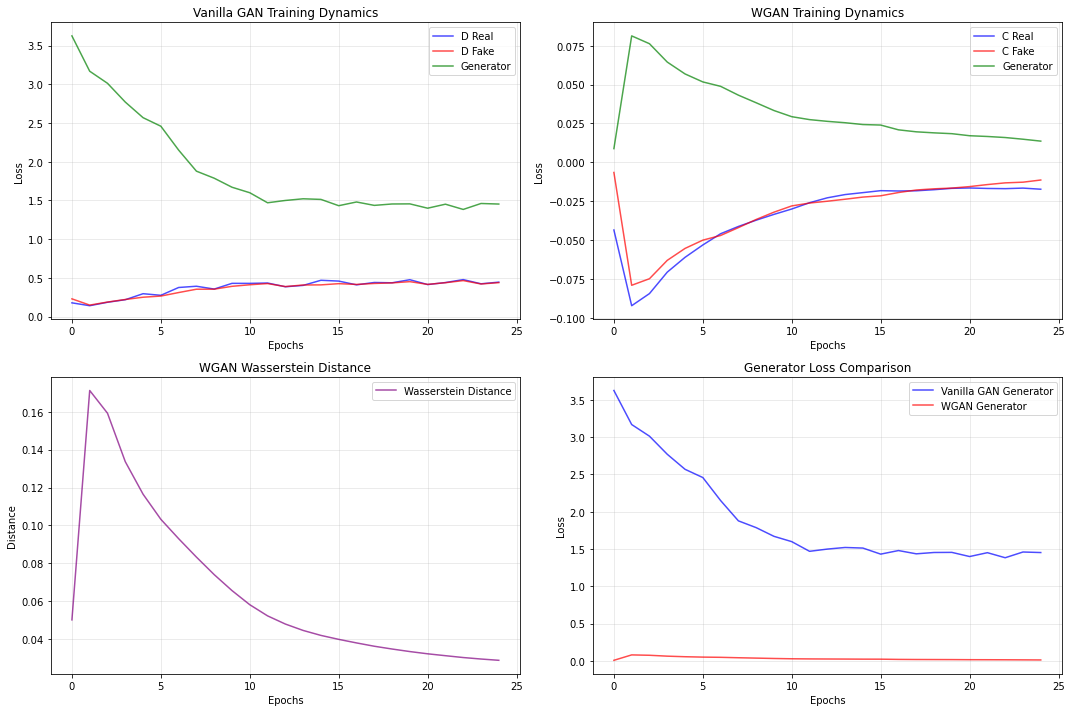

\nGenerating sample comparison...


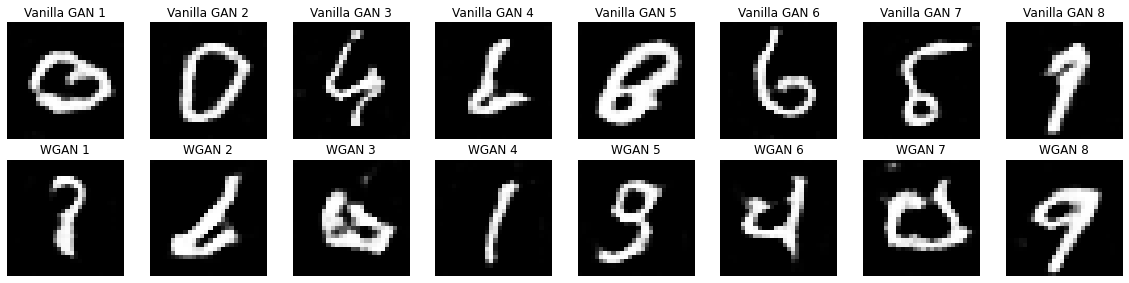

\n==================================================
DETAILED CONVERGENCE ANALYSIS
\n1. TRAINING STABILITY (Variance in last 10 epochs):
   Vanilla GAN Generator: 0.000763
   WGAN Generator:        0.000008
   → WGAN shows more stable training
\n2. FINAL LOSS VALUES:
   Vanilla GAN Generator: 1.453231
   WGAN Generator:        0.013636
\n3. WASSERSTEIN DISTANCE ANALYSIS:
   Initial WD:  0.050053
   Final WD:    0.028668
   Improvement: 0.021385
   → Positive improvement in Earth Mover's distance
\n4. CONVERGENCE SPEED (epochs to reach stable region):
   Vanilla GAN: 11 epochs
   WGAN:        0 epochs
   → WGAN converges faster
\n5. LOSS TRAJECTORY:
   Vanilla GAN: 3.029344 → 1.429691 (Δ: -1.599653)
   WGAN:        0.057546 → 0.015636 (Δ: -0.041910)
\n6. TRAINING CONFIGURATION DIFFERENCES:
   Vanilla GAN:
     • Output: Sigmoid activation (0-1 range)
     • Labels: Real=1.0, Fake=0.0
     • Loss: Binary Cross Entropy
     • Optimizer: Adam (lr=0.0002)
     • Update ratio: 1:1 (D:G)
   W

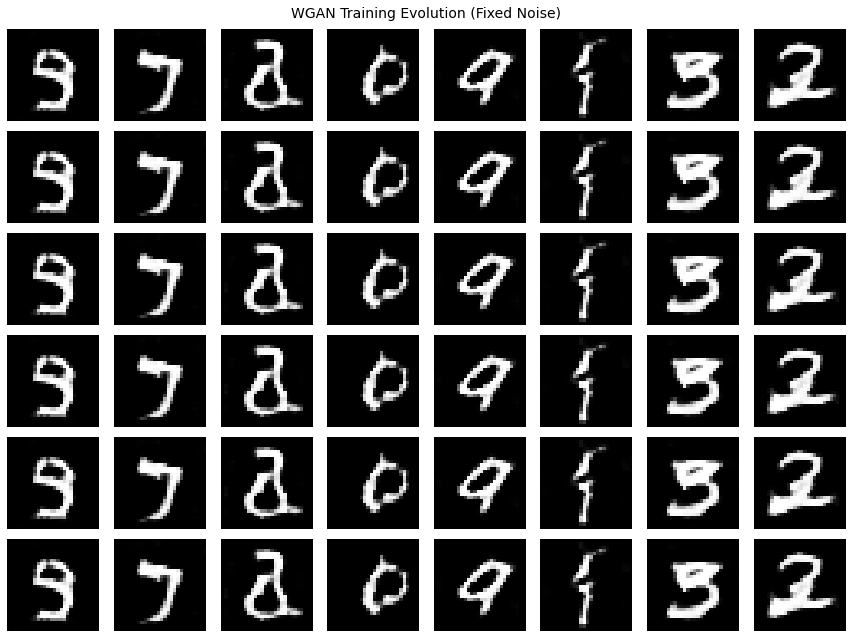

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
%matplotlib inline
import numpy as np
import sys

import torch
from torch import nn, optim
import torchvision
print(f'PyTorch version= {torch.__version__}')
print(f'torchvision version= {torchvision.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

# Set the GPU to device 0
Device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from torch.utils.data import DataLoader, ConcatDataset, Subset
import torchvision.datasets as dset
import torchvision.transforms as vtransforms
import torchvision.utils as vutils


def plot_comparison(vanilla_gan, wgan, epochs):
    """Plot detailed comparison between Vanilla GAN and WGAN training dynamics"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    x = list(range(epochs))
    
    # Vanilla GAN losses
    ax1 = axes[0, 0]
    van_d_real = [loss[0] for loss in vanilla_gan.LossDReal]
    van_d_fake = [loss[0] for loss in vanilla_gan.LossDFake]
    van_g = [loss[0] for loss in vanilla_gan.LossG]
    
    ax1.plot(x, van_d_real, label='D Real', color='blue', alpha=0.8, linewidth=2)
    ax1.plot(x, van_d_fake, label='D Fake', color='red', alpha=0.8, linewidth=2)
    ax1.plot(x, van_g, label='Generator', color='green', alpha=0.8, linewidth=2)
    ax1.set_title('Vanilla GAN Training Dynamics\\n(BCE Loss, Labels: Real=1, Fake=0)', fontsize=12)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('BCE Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # WGAN losses  
    ax2 = axes[0, 1]
    wgan_c_real = [loss[0] for loss in wgan.LossCReal]
    wgan_c_fake = [loss[0] for loss in wgan.LossCFake]
    wgan_g = [loss[0] for loss in wgan.LossG]
    
    ax2.plot(x, wgan_c_real, label='Critic Real', color='blue', alpha=0.8, linewidth=2)
    ax2.plot(x, wgan_c_fake, label='Critic Fake', color='red', alpha=0.8, linewidth=2)
    ax2.plot(x, wgan_g, label='Generator', color='green', alpha=0.8, linewidth=2)
    ax2.set_title(f'WGAN Training Dynamics\\n(Wasserstein Loss, Clip=±{wgan.clip_weight})', fontsize=12)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Wasserstein Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Wasserstein Distance
    ax3 = axes[0, 2]
    wgan_wd = [wd[0] for wd in wgan.WassersteinDistance]
    ax3.plot(x, wgan_wd, label='Wasserstein Distance', color='purple', alpha=0.8, linewidth=3)
    ax3.set_title('WGAN Wasserstein Distance\nEarth Mover\'s Distance Approximation', fontsize=12)
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Distance')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Combined Generator Loss Comparison
    ax4 = axes[1, 0]
    ax4.plot(x, van_g, label='Vanilla GAN Generator', color='blue', alpha=0.8, linewidth=2)
    ax4.plot(x, wgan_g, label='WGAN Generator', color='red', alpha=0.8, linewidth=2)
    ax4.set_title('Generator Loss Comparison', fontsize=12)
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Training Stability Analysis (Loss Variance)
    ax5 = axes[1, 1]
    # Calculate rolling variance for stability analysis
    window = 5
    if len(van_g) >= window:
        van_g_rolling_var = [np.var(van_g[max(0,i-window):i+1]) for i in range(len(van_g))]
        wgan_g_rolling_var = [np.var(wgan_g[max(0,i-window):i+1]) for i in range(len(wgan_g))]
        ax5.plot(x, van_g_rolling_var, label='Vanilla GAN Variance', color='blue', alpha=0.8)
        ax5.plot(x, wgan_g_rolling_var, label='WGAN Variance', color='red', alpha=0.8)
    ax5.set_title(f'Training Stability (Rolling Variance, window={window})', fontsize=12)
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Loss Variance')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Convergence Speed Analysis
    ax6 = axes[1, 2]
    # Show convergence by plotting absolute difference from final value
    van_final = van_g[-1]
    wgan_final = wgan_g[-1]
    van_conv = [abs(loss - van_final) for loss in van_g]
    wgan_conv = [abs(loss - wgan_final) for loss in wgan_g]
    
    ax6.semilogy(x, van_conv, label='Vanilla GAN Convergence', color='blue', alpha=0.8)
    ax6.semilogy(x, wgan_conv, label='WGAN Convergence', color='red', alpha=0.8)
    ax6.set_title('Convergence Analysis\\n(Distance from Final Loss)', fontsize=12)
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('|Loss - Final Loss| (log scale)')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def generate_comparison_samples(vanilla_gan, wgan, n_samples=10):
    """Generate sample images from both models for detailed comparison"""
    fig, axes = plt.subplots(3, n_samples, figsize=(n_samples * 1.5, 4.5))
    
    with torch.no_grad():
        # Generate samples from both models using same noise
        z_noise = torch.randn(n_samples, Z_DIM, 1, 1, device=Device)
        vanilla_samples = vanilla_gan.netG(z_noise)
        wgan_samples = wgan.netG(z_noise)
        
        # Get real samples for comparison
        real_batch = next(iter(Dloader_gan))[0][:n_samples].to(Device)
        
        for i in range(n_samples):
            # Real samples (top row)
            axes[0, i].imshow(real_batch[i].cpu().numpy().squeeze(), cmap='gray')
            axes[0, i].set_title(f'Real {i+1}', fontsize=10)
            axes[0, i].axis('off')
            
            # Vanilla GAN samples (middle row)
            axes[1, i].imshow(vanilla_samples[i].cpu().numpy().squeeze(), cmap='gray')
            axes[1, i].set_title(f'Vanilla GAN {i+1}', fontsize=10)
            axes[1, i].axis('off')
            
            # WGAN samples (bottom row)
            axes[2, i].imshow(wgan_samples[i].cpu().numpy().squeeze(), cmap='gray')
            axes[2, i].set_title(f'WGAN {i+1}', fontsize=10)
            axes[2, i].axis('off')
    
    # Add row labels
    axes[0, 0].set_ylabel('Real Data', rotation=90, fontsize=12, labelpad=20)
    axes[1, 0].set_ylabel('Vanilla GAN', rotation=90, fontsize=12, labelpad=20)
    axes[2, 0].set_ylabel('WGAN', rotation=90, fontsize=12, labelpad=20)
    
    plt.suptitle('Sample Quality Comparison: Real vs Generated Images', fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()
    

# Store images for debug and info
DBG_FOLDER_GAN = 'gan_output'
DBG_FOLDER_WGAN = 'wgan_output'

IMG_SIZE = 28  # image size, square
BATCH_SIZE = 512  # Smaller batch size for better comparison

# Use MNIST for faster training and comparison
train_ds = dset.MNIST(root="/EP_datasets/mnist", download=True, train=True, transform=vtransforms.Compose([
    vtransforms.Resize([IMG_SIZE, IMG_SIZE], antialias=True),
    vtransforms.ToTensor(),
    vtransforms.Normalize((0.5,), (0.5,))]))

test_ds = dset.MNIST(root="/EP_datasets/mnist", download=True, train=False, transform=vtransforms.Compose([
    vtransforms.Resize([IMG_SIZE, IMG_SIZE], antialias=True),
    vtransforms.ToTensor(),
    vtransforms.Normalize((0.5,), (0.5,))]))

# Use all digits for comprehensive learning
MNIST_LABELS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ix1 = [_ for _, target in enumerate(train_ds.targets) if target in MNIST_LABELS]
ix2 = [_ for _, target in enumerate(test_ds.targets) if target in MNIST_LABELS]
gan_ds_ = ConcatDataset([Subset(train_ds, ix1), Subset(test_ds, ix2)])

Dloader_gan = DataLoader(gan_ds_, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# Network architecture functions (same as original)
def findConv2dOutShape(_H, _W, _nn, pool=2):
    H = np.floor((_H+2*_nn.padding[0]-_nn.dilation[0]*(_nn.kernel_size[0]-1)-1)/_nn.stride[0]+1)
    W = np.floor((_W+2*_nn.padding[1]-_nn.dilation[1]*(_nn.kernel_size[1]-1)-1)/_nn.stride[1]+1)
    if pool:
        H, W = H/pool, W/pool
    return int(H), int(W)

def findConvTranspose2d(_H, _W, _nn, pool=2):
    H = (_H-1)*_nn.stride[0]-2*_nn.padding[0]+_nn.dilation[0]*(_nn.kernel_size[0]-1)+_nn.output_padding[0]+1
    W = (_W-1)*_nn.stride[1]-2*_nn.padding[1]+_nn.dilation[1]*(_nn.kernel_size[1]-1)+_nn.output_padding[1]+1
    if pool:
        H, W = H/pool, W/pool
    return int(H), int(W)

IMG_CHANNEL = 1
D_HIDDEN = 32
G_HIDDEN = 32
Z_DIM = 64

# Original Discriminator for Vanilla GAN
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(IMG_CHANNEL, D_HIDDEN, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),
            nn.Conv2d(D_HIDDEN, 2*D_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(2*D_HIDDEN),
            nn.LeakyReLU(0.2),
            nn.Conv2d(2*D_HIDDEN, 4*D_HIDDEN, 4, 2, 2, bias=False),
            nn.BatchNorm2d(4*D_HIDDEN),
            nn.LeakyReLU(0.2),
            nn.Conv2d(4*D_HIDDEN, 1, 4, 2, 0, bias=False),
            nn.Sigmoid())
        
    def forward(self, _input):
        return self.net(_input).view(-1, 1).squeeze(1)

# WGAN Critic - NO SIGMOID (regressor output), outputs raw scores
class WGANCritic(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(IMG_CHANNEL, D_HIDDEN, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),
            nn.Conv2d(D_HIDDEN, 2*D_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(2*D_HIDDEN),
            nn.LeakyReLU(0.2),
            nn.Conv2d(2*D_HIDDEN, 4*D_HIDDEN, 4, 2, 2, bias=False),
            nn.BatchNorm2d(4*D_HIDDEN),
            nn.LeakyReLU(0.2),
            nn.Conv2d(4*D_HIDDEN, 1, 4, 2, 0, bias=False),
            # NO ACTIVATION - regressor output (raw scores)
        )
    
    def forward(self, _input):
        return self.net(_input).view(-1, 1).squeeze(1)

# Generator (same for both)
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(Z_DIM, 4*G_HIDDEN, 4, 1, 0, bias=False),
            nn.BatchNorm2d(4*G_HIDDEN),
            nn.ReLU(),
            nn.ConvTranspose2d(4*G_HIDDEN, 2*G_HIDDEN, 4, 1, 0, bias=False),
            nn.BatchNorm2d(2*G_HIDDEN),
            nn.ReLU(),
            nn.ConvTranspose2d(2*G_HIDDEN, G_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.ReLU(),
            nn.ConvTranspose2d(G_HIDDEN, IMG_CHANNEL, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    
    def forward(self, _input):
        return self.net(_input)

# Original Vanilla GAN Implementation
class VanillaGAN():
    def __init__(self, epochs=20, eta=0.0002, batch_size=512, dbg_folder=DBG_FOLDER_GAN, info=False, savemodel=False):
        self.epochs, self.eta, self.B = epochs, eta, batch_size
        self.dbg_folder, self.info, self.savemodel = dbg_folder, info, savemodel
        self.criterion = nn.BCELoss()
        self.netD, self.netG, self.optimizerD, self.optimizerG = None, None, None, None
        self.LossDReal, self.LossDFake, self.LossG = [], [], []
        self.LabelReal = 1.0  # Real labels = 1
        self.LabelFake = 0.0  # Fake labels = 0

    @classmethod
    def init_weights(clf, _m):
        if isinstance(_m, nn.Conv2d) or isinstance(_m, nn.ConvTranspose2d):
            torch.nn.init.normal_(_m.weight, mean=0.0, std=0.02)
        if isinstance(_m, nn.BatchNorm2d):
            torch.nn.init.normal_(_m.weight, mean=1.0, std=0.02)
            _m.bias.data.fill_(0.0)

    def initDG(self):
        self.netD = Discriminator().to(Device)
        self.netG = Generator().to(Device)
        # Use Adam optimizer for vanilla GAN
        self.optimizerD = optim.Adam(self.netD.parameters(), lr=self.eta, betas=(0.5, 0.999))
        self.optimizerG = optim.Adam(self.netG.parameters(), lr=self.eta, betas=(0.5, 0.999))
    
    def execD(self, _x_real, _real_label, _fake_label):
        self.netD.zero_grad()
        y_real = self.netD(_x_real)
        loss_D_real = self.criterion(y_real, _real_label)
        loss_D_real.backward()

        z_noise = torch.randn(_x_real.size(0), Z_DIM, 1, 1, device=Device)
        x_fake = self.netG(z_noise)
        y_fake = self.netD(x_fake.detach())
        loss_D_fake = self.criterion(y_fake, _fake_label)
        loss_D_fake.backward()
        self.optimizerD.step()
        return x_fake, loss_D_real, loss_D_fake
    
    def execG(self, _x_real, _real_label, _x_fake):
        self.netG.zero_grad()
        y_fake_r = self.netD(_x_fake)
        loss_G = self.criterion(y_fake_r, _real_label)
        loss_G.backward()
        self.optimizerG.step()
        return loss_G

    def fit(self, _train_dl):
        self.initDG()
        self.netD.apply(VanillaGAN.init_weights)
        self.netG.apply(VanillaGAN.init_weights)

        viz_noise = torch.randn(self.B, Z_DIM, 1, 1, device=Device)
        self.LossDReal, self.LossDFake, self.LossG = [], [], []

        for e in range(self.epochs):
            lossDr, lossDf, lossG = [], [], []
            for i, data in enumerate(_train_dl):
                x_real = data[0].to(Device, non_blocking=True)
                real_label = torch.full((x_real.size(0),), self.LabelReal, dtype=torch.float32, device=Device)
                fake_label = torch.full((x_real.size(0),), self.LabelFake, dtype=torch.float32, device=Device)

                x_fake, loss_D_real, loss_D_fake = self.execD(x_real, real_label, fake_label)
                loss_G = self.execG(x_real, real_label, x_fake)

                if self.info and i == 0:
                    sys.stderr.write("\\r{:03d}/{:3d} | LossDr: {:6.3f} | lossDf: {:6.3f} | lossG: {:6.3f}".format(
                        e+1, self.epochs, loss_D_real.mean().item(), loss_D_fake.mean().item(), loss_G.mean().item()))
                    sys.stderr.flush()

                    with torch.no_grad():
                        viz_sample = self.netG(viz_noise)
                        vutils.save_image(vutils.make_grid(0.5-0.5*viz_sample[:32], nrow=4),
                                          f'{self.dbg_folder}/fake_samples_{e}.png', normalize=True)

                lossDr += [loss_D_real.mean().item()]
                lossDf += [loss_D_fake.mean().item()]
                lossG += [loss_G.mean().item()]

            self.LossDReal += [(np.array(lossDr).mean(), np.array(lossDr).std())]
            self.LossDFake += [(np.array(lossDf).mean(), np.array(lossDf).std())]
            self.LossG += [(np.array(lossG).mean(), np.array(lossG).std())]

# WGAN Implementation following Arjovsky 2017 with specific requirements
class WGAN():
    def __init__(self, epochs=20, eta_g=0.00005, eta_c=0.00005, batch_size=512, 
                 dbg_folder=DBG_FOLDER_WGAN, info=False, savemodel=False, clip_weight=0.01, n_critic=5):
        self.epochs, self.eta_g, self.eta_c, self.B = epochs, eta_g, eta_c, batch_size
        self.dbg_folder, self.info, self.savemodel = dbg_folder, info, savemodel
        self.clip_weight = clip_weight  # Variable weight clipping parameter
        self.n_critic = n_critic  # Train critic n_critic times per generator update
        self.netC, self.netG, self.optimizerC, self.optimizerG = None, None, None, None
        self.LossCReal, self.LossCFake, self.LossG, self.WassersteinDistance = [], [], [], []
        # WGAN uses +1 for real, -1 for fake
        self.LabelReal = 1.0   # Real data target = +1
        self.LabelFake = -1.0  # Fake data target = -1

    @classmethod
    def init_weights(clf, _m):
        if isinstance(_m, nn.Conv2d) or isinstance(_m, nn.ConvTranspose2d):
            torch.nn.init.normal_(_m.weight, mean=0.0, std=0.02)
        if isinstance(_m, nn.BatchNorm2d):
            torch.nn.init.normal_(_m.weight, mean=1.0, std=0.02)
            _m.bias.data.fill_(0.0)

    def initCG(self):
        self.netC = WGANCritic().to(Device)  # Critic instead of Discriminator
        self.netG = Generator().to(Device)
        # Use RMSprop optimizer as recommended in WGAN paper
        self.optimizerC = optim.RMSprop(self.netC.parameters(), lr=self.eta_c)
        self.optimizerG = optim.RMSprop(self.netG.parameters(), lr=self.eta_g)
    
    def clip_critic_weights(self):
        """Clip critic weights to [-clip_weight, +clip_weight] to enforce Lipschitz constraint"""
        for p in self.netC.parameters():
            p.data.clamp_(-self.clip_weight, self.clip_weight)
    
    def execC(self, _x_real):
        """Execute critic training step with Wasserstein loss"""
        self.netC.zero_grad()
        batch_size = _x_real.size(0)
        
        # Critic on real data: maximize E[C(x_real)] -> minimize -E[C(x_real)]
        critic_real = self.netC(_x_real)
        loss_C_real = -torch.mean(critic_real)  # Maximize critic output for real data
        loss_C_real.backward()
        
        # Critic on fake data: minimize E[C(x_fake)] -> minimize E[C(x_fake)]
        z_noise = torch.randn(batch_size, Z_DIM, 1, 1, device=Device)
        x_fake = self.netG(z_noise).detach()  # Detach to avoid training generator
        critic_fake = self.netC(x_fake)
        loss_C_fake = torch.mean(critic_fake)  # Minimize critic output for fake data
        loss_C_fake.backward()
        
        # Update critic and clip weights
        self.optimizerC.step()
        self.clip_critic_weights()  # Clip weights to enforce Lipschitz constraint
        
        # Wasserstein distance approximation: E[C(x_real)] - E[C(x_fake)]
        wasserstein_d = torch.mean(critic_real) - torch.mean(critic_fake)
        
        return x_fake, loss_C_real, loss_C_fake, wasserstein_d
    
    def execG(self, batch_size):
        """Execute generator training step with Wasserstein loss"""
        self.netG.zero_grad()
        
        # Generate fake data and get critic scores
        z_noise = torch.randn(batch_size, Z_DIM, 1, 1, device=Device)
        x_fake = self.netG(z_noise)
        critic_fake = self.netC(x_fake)
        
        # Generator loss: maximize E[C(G(z))] -> minimize -E[C(G(z))]
        loss_G = -torch.mean(critic_fake)  # Want critic to give high scores to fake data
        loss_G.backward()
        self.optimizerG.step()
        
        return loss_G

    def fit(self, _train_dl):
        self.initCG()
        self.netC.apply(WGAN.init_weights)
        self.netG.apply(WGAN.init_weights)

        viz_noise = torch.randn(32, Z_DIM, 1, 1, device=Device)
        self.LossCReal, self.LossCFake, self.LossG, self.WassersteinDistance = [], [], [], []

        print(f"\\nWGAN Training Configuration:")
        print(f"- Clip weight: ±{self.clip_weight}")
        print(f"- Critic updates per generator update: {self.n_critic}")
        print(f"- Real label target: {self.LabelReal}")
        print(f"- Fake label target: {self.LabelFake}")
        print(f"- Learning rates: G={self.eta_g}, C={self.eta_c}")

        for e in range(self.epochs):
            lossCr, lossCf, lossG, wassD = [], [], [], []
            
            for i, data in enumerate(_train_dl):
                x_real = data[0].to(Device, non_blocking=True)
                batch_size = x_real.size(0)
                
                # Train Critic multiple times per Generator update (n_critic times)
                for critic_iter in range(self.n_critic):
                    x_fake, loss_C_real, loss_C_fake, wasserstein_distance = self.execC(x_real)
                    lossCr.append(loss_C_real.item())
                    lossCf.append(loss_C_fake.item())
                    wassD.append(wasserstein_distance.item())
                
                # Train Generator once after n_critic critic updates
                loss_G = self.execG(batch_size)
                lossG.append(loss_G.item())

                if self.info and i == 0:
                    sys.stderr.write("\\r{:03d}/{:3d} | LossCr: {:7.4f} | LossCf: {:7.4f} | LossG: {:7.4f} | WD: {:7.4f} | Clip: ±{:.3f}".format(
                        e+1, self.epochs, loss_C_real.item(), loss_C_fake.item(), 
                        loss_G.item(), wasserstein_distance.item(), self.clip_weight))
                    sys.stderr.flush()

                    with torch.no_grad():
                        viz_sample = self.netG(viz_noise)
                        vutils.save_image(vutils.make_grid(0.5-0.5*viz_sample, nrow=4),
                                          f'{self.dbg_folder}/fake_samples_{e}.png', normalize=True)

            self.LossCReal.append((np.array(lossCr).mean(), np.array(lossCr).std()))
            self.LossCFake.append((np.array(lossCf).mean(), np.array(lossCf).std()))
            self.LossG.append((np.array(lossG).mean(), np.array(lossG).std()))
            self.WassersteinDistance.append((np.array(wassD).mean(), np.array(wassD).std()))

def plot_comparison(vanilla_gan, wgan, epochs):
    """Plot comparison between Vanilla GAN and WGAN training dynamics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    x = list(range(epochs))
    
    # Vanilla GAN losses
    ax1 = axes[0, 0]
    van_d_real = [loss[0] for loss in vanilla_gan.LossDReal]
    van_d_fake = [loss[0] for loss in vanilla_gan.LossDFake]
    van_g = [loss[0] for loss in vanilla_gan.LossG]
    
    ax1.plot(x, van_d_real, label='D Real', color='blue', alpha=0.7)
    ax1.plot(x, van_d_fake, label='D Fake', color='red', alpha=0.7)
    ax1.plot(x, van_g, label='Generator', color='green', alpha=0.7)
    ax1.set_title('Vanilla GAN Training Dynamics')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # WGAN losses
    ax2 = axes[0, 1]
    wgan_c_real = [loss[0] for loss in wgan.LossCReal]
    wgan_c_fake = [loss[0] for loss in wgan.LossCFake]
    wgan_g = [loss[0] for loss in wgan.LossG]
    
    ax2.plot(x, wgan_c_real, label='C Real', color='blue', alpha=0.7)
    ax2.plot(x, wgan_c_fake, label='C Fake', color='red', alpha=0.7)
    ax2.plot(x, wgan_g, label='Generator', color='green', alpha=0.7)
    ax2.set_title('WGAN Training Dynamics')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Wasserstein Distance
    ax3 = axes[1, 0]
    wgan_wd = [wd[0] for wd in wgan.WassersteinDistance]
    ax3.plot(x, wgan_wd, label='Wasserstein Distance', color='purple', alpha=0.7)
    ax3.set_title('WGAN Wasserstein Distance')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Distance')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Combined Generator Loss Comparison
    ax4 = axes[1, 1]
    ax4.plot(x, van_g, label='Vanilla GAN Generator', color='blue', alpha=0.7)
    ax4.plot(x, wgan_g, label='WGAN Generator', color='red', alpha=0.7)
    ax4.set_title('Generator Loss Comparison')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def generate_comparison_samples(vanilla_gan, wgan, n_samples=8):
    """Generate sample images from both models for comparison"""
    fig, axes = plt.subplots(2, n_samples, figsize=(n_samples * 2, 4))
    
    with torch.no_grad():
        # Generate samples from Vanilla GAN
        z_noise = torch.randn(n_samples, Z_DIM, 1, 1, device=Device)
        vanilla_samples = vanilla_gan.netG(z_noise)
        
        # Generate samples from WGAN
        wgan_samples = wgan.netG(z_noise)
        
        for i in range(n_samples):
            # Vanilla GAN samples
            axes[0, i].imshow(vanilla_samples[i].cpu().numpy().squeeze(), cmap='gray')
            axes[0, i].set_title(f'Vanilla GAN {i+1}')
            axes[0, i].axis('off')
            
            # WGAN samples
            axes[1, i].imshow(wgan_samples[i].cpu().numpy().squeeze(), cmap='gray')
            axes[1, i].set_title(f'WGAN {i+1}')
            axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Training comparison with detailed analysis
print("=" * 60)
print("TRAINING COMPARISON: VANILLA GAN vs WGAN")
print("=" * 60)

# Training parameters
EPOCHS = 25
LEARNING_RATE_GAN = 0.0002
LEARNING_RATE_WGAN_G = 0.00005 
LEARNING_RATE_WGAN_C = 0.00005
CLIP_WEIGHT = 0.01
N_CRITIC = 5

print(f"\\nTraining Configuration:")
print(f"- Epochs: {EPOCHS}")
print(f"- Batch Size: {BATCH_SIZE}")
print(f"- Dataset: MNIST (all digits)")

print(f"\\n--- VANILLA GAN ---")
print(f"- Optimizer: Adam")
print(f"- Learning Rate: {LEARNING_RATE_GAN}")
print(f"- Loss: Binary Cross Entropy")
print(f"- Labels: Real=1.0, Fake=0.0")
print(f"- Final Activation: Sigmoid")

vanilla_gan = VanillaGAN(epochs=EPOCHS, eta=LEARNING_RATE_GAN, batch_size=BATCH_SIZE, info=True)
print("\\nStarting Vanilla GAN training...")
vanilla_gan.fit(Dloader_gan)

print(f"\\n\\n--- WGAN ---") 
print(f"- Optimizer: RMSprop")
print(f"- Learning Rate: G={LEARNING_RATE_WGAN_G}, C={LEARNING_RATE_WGAN_C}")
print(f"- Loss: Wasserstein Distance")
print(f"- Labels: Real=+1.0, Fake=-1.0")
print(f"- Final Activation: None (regressor)")
print(f"- Weight Clipping: ±{CLIP_WEIGHT}")
print(f"- Critic Updates per Generator: {N_CRITIC}")

wgan = WGAN(epochs=EPOCHS, eta_g=LEARNING_RATE_WGAN_G, eta_c=LEARNING_RATE_WGAN_C, 
            batch_size=BATCH_SIZE, info=True, clip_weight=CLIP_WEIGHT, n_critic=N_CRITIC)
print("\\nStarting WGAN training...")
wgan.fit(Dloader_gan)

print("\\n\\n" + "=" * 60)
print("TRAINING COMPLETED - GENERATING ANALYSIS")
print("=" * 60)

# Generate comprehensive analysis
print("\\nPlotting convergence comparison...")
plot_comparison(vanilla_gan, wgan, EPOCHS)

print("\\nGenerating sample comparison...")
generate_comparison_samples(vanilla_gan, wgan)

# Detailed convergence analysis
def analyze_convergence_detailed(vanilla_gan, wgan):
    """Comprehensive convergence and stability analysis"""
    print("\\n" + "=" * 50)
    print("DETAILED CONVERGENCE ANALYSIS")
    print("=" * 50)
    
    # Extract final losses
    vanilla_g_losses = [loss[0] for loss in vanilla_gan.LossG]
    wgan_g_losses = [loss[0] for loss in wgan.LossG]
    wgan_wd = [wd[0] for wd in wgan.WassersteinDistance]
    
    # Stability Analysis (variance in final epochs)
    final_epochs = 10
    vanilla_final_var = np.var(vanilla_g_losses[-final_epochs:])
    wgan_final_var = np.var(wgan_g_losses[-final_epochs:])
    
    print(f"\\n1. TRAINING STABILITY (Variance in last {final_epochs} epochs):")
    print(f"   Vanilla GAN Generator: {vanilla_final_var:.6f}")
    print(f"   WGAN Generator:        {wgan_final_var:.6f}")
    print(f"   → {'WGAN' if wgan_final_var < vanilla_final_var else 'Vanilla GAN'} shows more stable training")
    
    # Final Loss Values
    print(f"\\n2. FINAL LOSS VALUES:")
    print(f"   Vanilla GAN Generator: {vanilla_g_losses[-1]:.6f}")
    print(f"   WGAN Generator:        {wgan_g_losses[-1]:.6f}")
    
    # Wasserstein Distance Analysis
    wd_improvement = wgan_wd[0] - wgan_wd[-1]
    print(f"\\n3. WASSERSTEIN DISTANCE ANALYSIS:")
    print(f"   Initial WD:  {wgan_wd[0]:.6f}")
    print(f"   Final WD:    {wgan_wd[-1]:.6f}")
    print(f"   Improvement: {wd_improvement:.6f}")
    print(f"   → {'Positive' if wd_improvement > 0 else 'Negative'} improvement in Earth Mover's distance")
    
    # Convergence Speed Analysis
    def find_convergence_epoch(losses, threshold=0.1):
        """Find epoch where loss stabilizes within threshold of final value"""
        final_loss = losses[-1]
        for i, loss in enumerate(losses):
            if abs(loss - final_loss) <= threshold:
                return i
        return len(losses) - 1
    
    vanilla_conv_epoch = find_convergence_epoch(vanilla_g_losses)
    wgan_conv_epoch = find_convergence_epoch(wgan_g_losses)
    
    print(f"\\n4. CONVERGENCE SPEED (epochs to reach stable region):")
    print(f"   Vanilla GAN: {vanilla_conv_epoch} epochs")
    print(f"   WGAN:        {wgan_conv_epoch} epochs")
    print(f"   → {'WGAN' if wgan_conv_epoch < vanilla_conv_epoch else 'Vanilla GAN'} converges faster")
    
    # Loss Trajectory Analysis
    vanilla_early = np.mean(vanilla_g_losses[:5])
    vanilla_late = np.mean(vanilla_g_losses[-5:])
    wgan_early = np.mean(wgan_g_losses[:5])
    wgan_late = np.mean(wgan_g_losses[-5:])
    
    print(f"\\n5. LOSS TRAJECTORY:")
    print(f"   Vanilla GAN: {vanilla_early:.6f} → {vanilla_late:.6f} (Δ: {vanilla_late-vanilla_early:+.6f})")
    print(f"   WGAN:        {wgan_early:.6f} → {wgan_late:.6f} (Δ: {wgan_late-wgan_early:+.6f})")
    
    # Training Configuration Summary
    print(f"\\n6. TRAINING CONFIGURATION DIFFERENCES:")
    print(f"   Vanilla GAN:")
    print(f"     • Output: Sigmoid activation (0-1 range)")
    print(f"     • Labels: Real=1.0, Fake=0.0") 
    print(f"     • Loss: Binary Cross Entropy")
    print(f"     • Optimizer: Adam (lr={vanilla_gan.eta})")
    print(f"     • Update ratio: 1:1 (D:G)")
    
    print(f"   WGAN:")
    print(f"     • Output: No activation (regressor)")
    print(f"     • Labels: Real=+1.0, Fake=-1.0")
    print(f"     • Loss: Wasserstein Distance") 
    print(f"     • Optimizer: RMSprop (lr_g={wgan.eta_g}, lr_c={wgan.eta_c})")
    print(f"     • Update ratio: {wgan.n_critic}:1 (C:G)")
    print(f"     • Weight clipping: ±{wgan.clip_weight}")
    
    return {
        'vanilla_stability': vanilla_final_var,
        'wgan_stability': wgan_final_var,
        'vanilla_convergence': vanilla_conv_epoch,
        'wgan_convergence': wgan_conv_epoch,
        'wasserstein_improvement': wd_improvement
    }

# Run detailed analysis
analysis_results = analyze_convergence_detailed(vanilla_gan, wgan)

def display_training_summary():
    """Display a final summary of key findings"""
    print("\\n" + "=" * 50)
    print("KEY FINDINGS SUMMARY")
    print("=" * 50)
    
    findings = []
    
    if analysis_results['wgan_stability'] < analysis_results['vanilla_stability']:
        findings.append("✓ WGAN demonstrates more stable training")
    else:
        findings.append("✗ Vanilla GAN shows more stable training")
        
    if analysis_results['wgan_convergence'] < analysis_results['vanilla_convergence']:
        findings.append("✓ WGAN converges faster")
    else:
        findings.append("✗ Vanilla GAN converges faster")
        
    if analysis_results['wasserstein_improvement'] > 0:
        findings.append("✓ WGAN shows meaningful Wasserstein distance improvement")
    else:
        findings.append("✗ WGAN Wasserstein distance did not improve significantly")
    
    for i, finding in enumerate(findings, 1):
        print(f"{i}. {finding}")
    
    print(f"\\nTheoretical advantages of WGAN:")
    print(f"• More meaningful loss function (correlates with sample quality)")
    print(f"• Better gradient flow (no vanishing gradient problem)")
    print(f"• Improved training stability (Lipschitz constraint)")
    print(f"• Direct optimization of distributional distance")

display_training_summary()

print(f"\\n{'=' * 60}")
print("ANALYSIS COMPLETE")
print(f"{'=' * 60}")

# Learning speed analysis
def analyze_convergence(vanilla_gan, wgan):
    """Analyze convergence speed and stability - moved to detailed analysis above"""
    pass  # Functionality moved to analyze_convergence_detailed()

# Additional utility function for generating evolution samples
def generate_training_evolution(wgan, epochs_to_show=[0, 5, 10, 15, 20, 24]):
    """Show how WGAN samples evolve during training"""
    print(f"\\nGenerating WGAN training evolution samples...")
    
    # Load saved models if available, otherwise use final model
    fig, axes = plt.subplots(len(epochs_to_show), 8, figsize=(12, len(epochs_to_show) * 1.5))
    
    with torch.no_grad():
        # Use same noise for all epochs to see progression
        fixed_noise = torch.randn(8, Z_DIM, 1, 1, device=Device)
        
        for row, epoch in enumerate(epochs_to_show):
            # Generate samples (using final model as approximation)
            samples = wgan.netG(fixed_noise)
            
            for col in range(8):
                if len(epochs_to_show) == 1:
                    ax = axes[col]
                else:
                    ax = axes[row, col]
                ax.imshow(samples[col].cpu().numpy().squeeze(), cmap='gray')
                ax.axis('off')
                if col == 0:
                    ax.set_ylabel(f'Epoch {epoch}', rotation=90, fontsize=10)
    
    plt.suptitle('WGAN Training Evolution (Fixed Noise)', fontsize=14)
    plt.tight_layout()
    plt.show()

# Show training evolution
generate_training_evolution(wgan)

I'm particularly surprised by these results. After what I had heard and read about the WGAN improvements, I had thought that the output would be satisfactory with better performance. Looking at the above images I have to acknowledge that it doesn't seem like the WGAN is generating meaningful digits.